In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys


In [21]:
def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('L') #grayscale
    img = np.array(img)
    return img

def compress_image(img, n_components):
    img_flattened = img.reshape(-1, img.shape[1])
    
    # Appy PCA
    pca = PCA(n_components = n_components)
    img_transformed = pca.fit_transform(img_flattened)
    
    img_reconstructed = pca.inverse_transform(img_transformed)
    img_compressed = img_reconstructed.reshape(img.shape)
    
    # Display original and compressed images
    plt.figure(figsize = (8,4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_compressed, cmap='gray')
    plt.title(f"Compressed Image\n(n_components = {n_components})")
    
    plt.show()
    
    # Print eigenvalues
    print("Eigenvalues : ")
    print(pca.explained_variance_)
    
    return img_transformed, pca

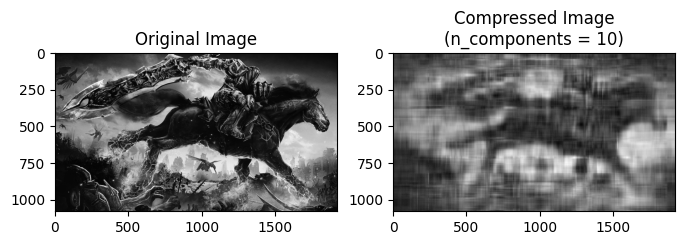

Eigenvalues : 
[1924335.01273113 1386078.03296045  776967.16586761  460614.44828475
  327177.3820605   298140.28429403  266090.00291543  176519.77733808
  147963.15839117  119705.0262743 ]


In [38]:
image_path = '/kaggle/input/bg-jpg/cool-backgrounds-1080p-14.jpg'
img = load_image(image_path)

n_components = 10
img_transformed, pca = compress_image(img, n_components)

In [23]:
# Calculate size
def calculate_size(array):
    return sys.getsizeof(array)

In [37]:
original_size = calculate_size(img)
compressed_size = calculate_size(img_transformed) + calculate_size(pca.components_)

print(f"Original image storage size : {original_size/1024:.5f}KB")
print(f"Compressed image storage size : {compressed_size/1024:.5f}KB")

Original image storage size : 2025.12500KB
Compressed image storage size : 0.25000KB


In [32]:
print(f"Compression Ratio : {original_size / compressed_size}")

Compression Ratio : 8100.5
